In [21]:
#Import all the required libraries
import os
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchvision import datasets, transforms

In [22]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [23]:
#Define the load data function
def data_loader(train_batch_size, test_batch_size):
    train_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    test_data = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_data, test_data)

In [24]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        
        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)

        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))

        x = self.l3(x)
        return x

In [25]:
def calculate_parameters(modelName, model):
    param = sum(p.numel() for p in model.parameters())
    print('{}: {}'.format(modelName, param))
    return param

In [26]:
def init_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [27]:
def train(model, optimizer, data):
    model.train()
    for batch_idx, (data, target) in enumerate(data):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        output = model(data)
        loss_fn = torch.nn.CrossEntropyLoss()
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [28]:
def calculate_ip_op_diff(model, loader):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    loss_fn = torch.nn.CrossEntropyLoss()
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [29]:
epochs=28

def train_models(model, optimizer, train_data, test_data):
    param_arr = []
    train_loss_arr = []
    test_loss_arr = []
    train_accuracy_arr = []
    test_accuracy_arr = []
    total_train_loss = 0
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_data)
        train_loss, train_acc = calculate_ip_op_diff(model, train_data)
        test_loss, test_acc = calculate_ip_op_diff(model, test_data)

        train_loss_arr.append(train_loss)
        test_loss_arr.append(test_loss)
        train_accuracy_arr.append(train_acc)
        test_accuracy_arr.append(test_acc)
        print('test loss - ', test_loss, ' epoch - ', epoch)
    return train_loss_arr, test_loss_arr, train_accuracy_arr, test_accuracy_arr, param_arr

In [30]:
train_data, test_data = data_loader(75, 75)

model_1 = Model()
optimizer = init_optimizer(model_1)
train_loss_arr_b1, test_loss_arr_b1, train_accuracy_arr_b1, test_accuracy_arr_b1, param_arr_b1 = train_models(model_1, optimizer, train_data, test_data)

Training model 
test loss -  tensor(0.0860)  epoch -  1
test loss -  tensor(0.0827)  epoch -  2
test loss -  tensor(0.0532)  epoch -  3
test loss -  tensor(0.0431)  epoch -  4
test loss -  tensor(0.0414)  epoch -  5
test loss -  tensor(0.0359)  epoch -  6
test loss -  tensor(0.0353)  epoch -  7
test loss -  tensor(0.0371)  epoch -  8
test loss -  tensor(0.0340)  epoch -  9
test loss -  tensor(0.0316)  epoch -  10
test loss -  tensor(0.0345)  epoch -  11
test loss -  tensor(0.0332)  epoch -  12
test loss -  tensor(0.0390)  epoch -  13
test loss -  tensor(0.0486)  epoch -  14
test loss -  tensor(0.0354)  epoch -  15
test loss -  tensor(0.0449)  epoch -  16
test loss -  tensor(0.0417)  epoch -  17
test loss -  tensor(0.0452)  epoch -  18
test loss -  tensor(0.0372)  epoch -  19
test loss -  tensor(0.0398)  epoch -  20
test loss -  tensor(0.0384)  epoch -  21
test loss -  tensor(0.0442)  epoch -  22
test loss -  tensor(0.0404)  epoch -  23
test loss -  tensor(0.0447)  epoch -  24
test loss

In [31]:
train_data, test_data = data_loader(500, 500)

model_2 = Model()
optimizer = init_optimizer(model_2)
train_loss_arr_b2, test_loss_arr_b2, train_accuracy_arr_b2, test_accuracy_arr_b2, param_arr_b2 = train_models(model_2, optimizer, train_data, test_data)

Training model 
test loss -  tensor(1.2970)  epoch -  1
test loss -  tensor(0.1895)  epoch -  2
test loss -  tensor(0.1181)  epoch -  3
test loss -  tensor(0.0979)  epoch -  4
test loss -  tensor(0.0841)  epoch -  5
test loss -  tensor(0.0696)  epoch -  6
test loss -  tensor(0.0631)  epoch -  7
test loss -  tensor(0.0553)  epoch -  8
test loss -  tensor(0.0514)  epoch -  9
test loss -  tensor(0.0525)  epoch -  10
test loss -  tensor(0.0474)  epoch -  11
test loss -  tensor(0.0474)  epoch -  12
test loss -  tensor(0.0461)  epoch -  13
test loss -  tensor(0.0469)  epoch -  14
test loss -  tensor(0.0407)  epoch -  15
test loss -  tensor(0.0429)  epoch -  16
test loss -  tensor(0.0405)  epoch -  17
test loss -  tensor(0.0398)  epoch -  18
test loss -  tensor(0.0394)  epoch -  19
test loss -  tensor(0.0362)  epoch -  20
test loss -  tensor(0.0361)  epoch -  21
test loss -  tensor(0.0372)  epoch -  22
test loss -  tensor(0.0360)  epoch -  23
test loss -  tensor(0.0469)  epoch -  24
test loss

In [32]:
param_b1 = torch.nn.utils.parameters_to_vector(model_1.parameters())
param_b2 = torch.nn.utils.parameters_to_vector(model_2.parameters())

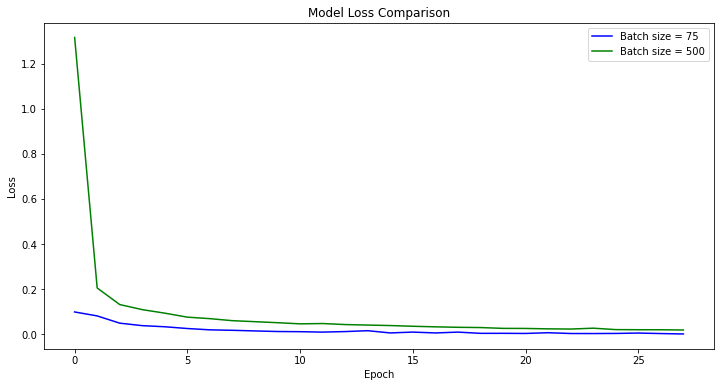

In [38]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), train_loss_arr_b1, color = "blue")
plt.plot(np.arange(0, 28, 1), train_loss_arr_b2, color = "green")
plt.title('Model Loss Comparison')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

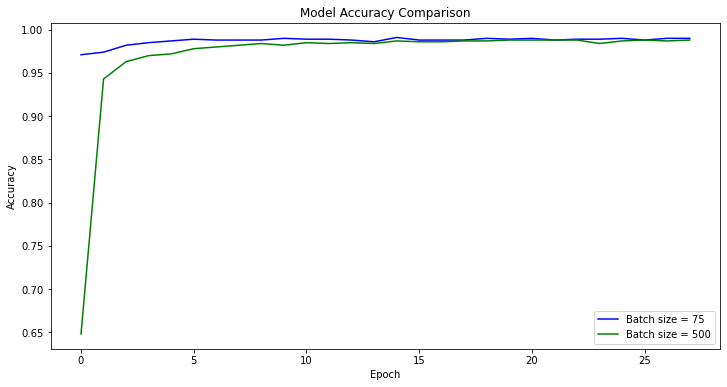

In [37]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b1, color = "blue")
plt.plot(np.arange(0, 28, 1), test_accuracy_arr_b2, color = "green")
plt.title('Model Accuracy Comparison')
plt.legend(['Batch size = 75', 'Batch size = 500'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()